## Structural Model of a White Dwarf

The internal structure of a white dwarf is described using a polytropic model in hydrostatic equilibrium, under the assumption of spherical symmetry. The governing equations of this system are:

- **Hydrostatic equilibrium equation**:

$$
\frac{dp}{dr} = -\frac{G M(r) \rho(r)}{r^2}
$$

- **Mass conservation equation**:

$$
\frac{dM}{dr} = 4\pi r^2 \rho(r)
$$

- **Polytropic equation of state**:

$$
p = K \rho^\gamma
$$

where:
- $ p(r)$: pressure as a function of radius  
- $ \rho(r) $: mass density  
- $ M(r) $: enclosed mass within radius \( r \)  
- $ G $: gravitational constant  
- $ K $: polytropic constant  
- $ \gamma = \frac{4}{3} $: adiabatic index for a relativistically degenerate electron gas

## References

> **Reference**: This formulation follows the problem statement from  
> *"Proyecto 04 – MHD: Estructura de una Enana Blanca"*, Universidad Nacional de Colombia, material del curso Astrofisica computacional (2024).


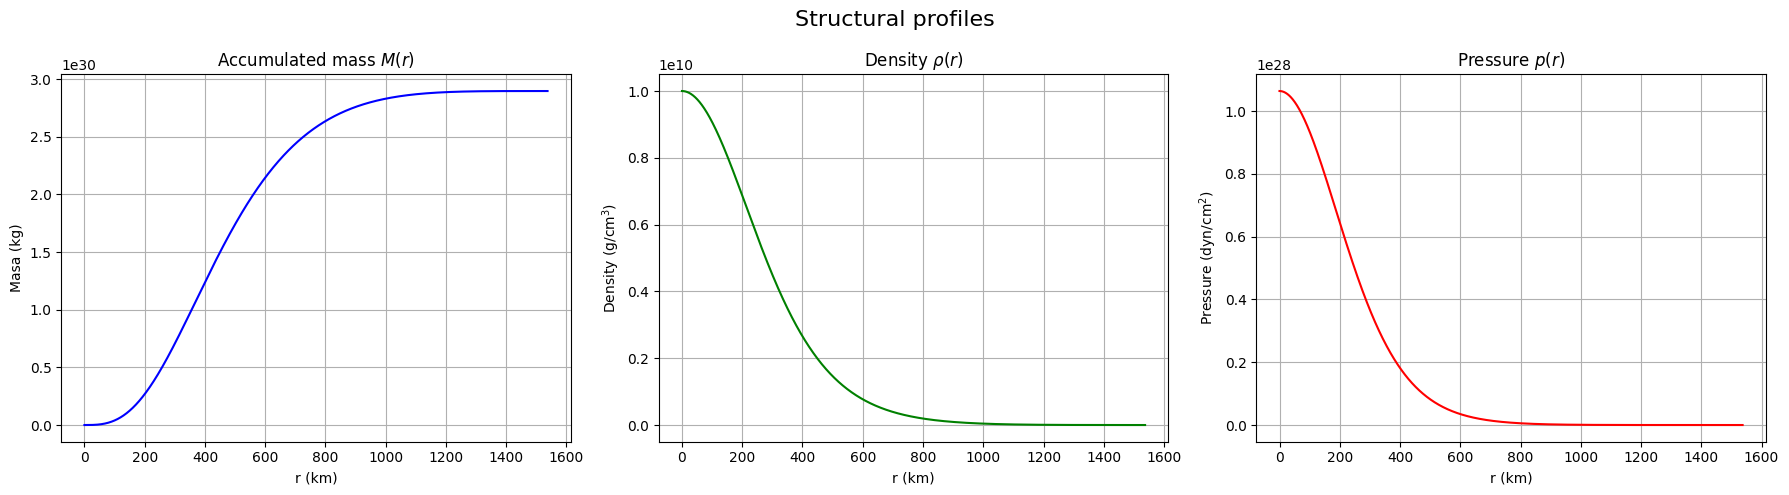

The radius in kilometers is: 1537.1537 km and in Solar radii: 0.0022
The mass of the star in kg is: 2897470223365303910487501570048.0000 and in solar masses: 1.4567


In [33]:
import numpy as np
import matplotlib.pyplot as plt


G = 6.67430e-8               # cm^3 g^-1 s^-2
gamma = 4 / 3
rho_c = 1e10                 # g/cm^3
K = 1.244e15 * (0.5)**gamma  #Polytropic constant

# Initial conditions
r0 = 1e-4               # cm
p0 = K * rho_c**gamma
M0 = (4/3) * np.pi * r0**3 * rho_c


# System of ODEs
def edo(r, y):
    p, M = y
    if p <= 0:
        return [0, 0]          # Stop integration if pressure is non-positive
    rho = (p / K)**(1 / gamma)
    dpdr = -G * M * rho / r**2 if r != 0 else 0
    dMdr = 4 * np.pi * r**2 * rho
    return [dpdr, dMdr]

# Runge-Kutta 4th order method
def RK4(f, t0, tf, q0, n):
    h = (tf - t0) / (n - 1)
    q = np.zeros((n, len(q0) + 1))
    q[0, 0] = t0
    q[0, 1:] = q0
    for i in range(n - 1):
        t = q[i, 0]
        y = q[i, 1:]
        if y[0] < 1e-10 * p0:    # Stop if pressure is very low
            return q[:i+1]
        
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))
        q[i + 1, 0] = t + h
        q[i + 1, 1:] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return q


rf = 1e9                 # Initial guess for the final radius 
q0 = np.array([p0, M0])
Q = RK4(edo, r0, rf, q0, 10000)

r = Q[:, 0]/100000 
p = Q[:, 1]
M = Q[:, 2]/1000
rho = (p / K)**(1 / gamma)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))


ax[0].plot(r, M, color='blue')
ax[0].set_title('Accumulated mass $M(r)$')
ax[0].set_xlabel('r (km)')
ax[0].set_ylabel('Masa (kg)')
ax[0].grid()


ax[1].plot(r, rho, color='green')
ax[1].set_title('Density $\\rho(r)$')
ax[1].set_xlabel('r (km)')
ax[1].set_ylabel('Density (g/cm$^3$)')
ax[1].grid()


ax[2].plot(r, p, color='red')
ax[2].set_title('Pressure $p(r)$')
ax[2].set_xlabel('r (km)')
ax[2].set_ylabel('Pressure (dyn/cm$^2$)')
ax[2].grid()

fig.suptitle('Structural profiles', fontsize=16)
fig.tight_layout()
plt.show()

Radius = r[-1] 
Radiusinsun = Radius/696340

Mass = M[-1]
mass_sun = Mass/1.989e30
 
print(f'The radius in kilometers is: {Radius:.4f} km and in Solar radii: {Radiusinsun:.4f}')

print(f"The mass of the star in kg is: {Mass:.4f} and in solar masses: {mass_sun:.4f}")

## Gravitational Potential Inside and Outside the White Dwarf

To determine the gravitational potential inside and outside the white dwarf, we start from the Poisson equation for gravity:

$$
\nabla^2 \phi(\vec{r}, t) = 4\pi G \rho(\vec{r}, t)
$$

Assuming spherical symmetry and time independence, the potential depends only on the radial coordinate \( r \), and the Laplacian becomes:

$$
\frac{1}{r^2} \frac{d}{dr} \left( r^2 \frac{d\phi}{dr} \right) = 4\pi G \rho(r)
$$

This is a second-order ordinary differential equation (ODE) for the gravitational potential \( \phi(r) \).

### Boundary Conditions

- At the center of the star:  
  $$ \left. \frac{d\phi}{dr} \right|_{r = 0} = 0 $$
  due to spherical symmetry.
  
- At large distances (outside the star where \( \rho \approx 0 \)):  
  $$ \phi(r) = -\frac{GM_*}{r} $$
  where \( M_* \) is the total mass of the white dwarf.

To solve this problem numerically, we rewrite the Poisson equation as a system of first-order equations:

$$
\begin{aligned}
y_0 &= \phi(r) \\
y_1 &= \frac{d\phi}{dr} \\
\Rightarrow
\begin{cases}
\frac{dy_0}{dr} = y_1 \\
\frac{dy_1}{dr} = 4\pi G \rho(r) - \frac{2}{r} y_1
\end{cases}
\end{aligned}
$$

The solution is integrated using the same radial grid from part A, with the density \( \rho(r) \) obtained from the polytropic model. Outside the star, where the density drops to zero, the potential follows the analytic expression for a point mass:

$$
\phi(r) = -\frac{GM_*}{r}
$$

Finally, the interior potential is shifted by a constant to match the exterior solution at the stellar surface \( r = R_* \), ensuring continuity.




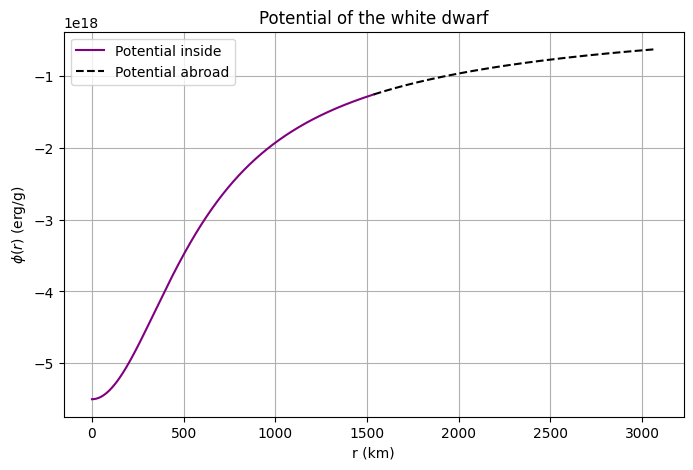

In [ ]:
from scipy.interpolate import interp1d

G = 6.67430e-8  # cm^3 g^-1 s^-2

r_cm = r * 1e5       # km → cm
M_g = M * 1e3        # kg → g

# Interpolation of density
rho_interp = interp1d(r_cm, rho, kind='cubic', fill_value="extrapolate")

# System of ODEs for the potential
def poisson(r, y, rho_interp):
    phi, dphidr = y
    rho_val = rho_interp(r)
    if r == 0:
        ddphidr = 0
    else:
        ddphidr = 4 * np.pi * G * rho_val - (2 / r) * dphidr
    return [dphidr, ddphidr]

# Runge-Kutta 4th order method for the potential
def RK4_poisson(f, t0, tf, y0, n):
    h = (tf - t0) / (n - 1)
    q = np.zeros((n, len(y0) + 1))
    q[0, 0] = t0
    q[0, 1:] = y0
    for i in range(n - 1):
        t = q[i, 0]
        y = q[i, 1:]
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + h/2, y + k1/2))
        k3 = h * np.array(f(t + h/2, y + k2/2))
        k4 = h * np.array(f(t + h, y + k3))
        q[i + 1, 0] = t + h
        q[i + 1, 1:] = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return q

# Initial conditions for the potential
phi0 = 0.0
dphidr0 = 0.0
y0_phi = [phi0, dphidr0]

phi_result = RK4_poisson(lambda r, y: poisson(r, y, rho_interp), r_cm[0], r_cm[-1], y0_phi, len(r_cm))
phi_int = phi_result[:, 1]

# Exterior potential
r_surface = r_cm[-1]
M_star = M_g[-1]
r_ext_cm = np.linspace(r_surface, 2 * r_surface, 500)
r_ext_km = r_ext_cm / 1e5
phi_ext = -G * M_star / r_ext_cm

# Make the potential continuous
delta_phi = phi_ext[0] - phi_int[-1]
phi_int_corr = phi_int + delta_phi

plt.figure(figsize=(8, 5))
plt.plot(r, phi_int_corr, label='Potential inside', color='purple')
plt.plot(r_ext_km, phi_ext, label='Potential abroad', linestyle='--', color='black')
plt.xlabel('r (km)')
plt.ylabel('$\\phi(r)$ (erg/g)')
plt.title('Potential of the white dwarf')
plt.grid()
plt.legend()
plt.show()


